In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from apportionment import *

In [2]:
df = pd.read_csv("./vis_data/electable-unweighted-vis-1m-2023.csv")
def visualise_and_print(link):
    df = pd.read_csv(link)

    plt.figure(figsize=(10, 6))

    x_values = (df['samples'] / 1000000) * 100
    y_values = df['diff']
    y_vals =  y_values - (3 * x_values)

    y_deriv = y_vals.diff()
    y_rolling = y_deriv.rolling(window=100, center=True).mean()

    x = np.arange(0, 4)
    y = 3 * x

    plt.plot(x_values, y_deriv, '-', markersize=1, label="First difference")
    plt.plot(x_values, y_rolling, '-', markersize=1, label="Rolling mean (window size = 0.01 % of voters)")

    plt.plot(x, y * 0, label='Linear trend')

    plt.xlabel('size of organised group (%)')
    plt.ylabel('change of seats - first difference')
    plt.title('Difference of seat distribution function')

    plt.legend()
    plt.show()

    max_index = y_rolling.idxmax()
    print(max_index)

    max_index = y_rolling[:3000].idxmax()
    print(max_index)




,samples,diff
0,1,0.002395
1,2,0.003994
2,3,0.003994
3,4,0.003994
4,5,0.003595
...,...,...
29995,29996,14.831996
29996,29997,14.832795
29997,29998,14.833194
29998,29999,14.833595


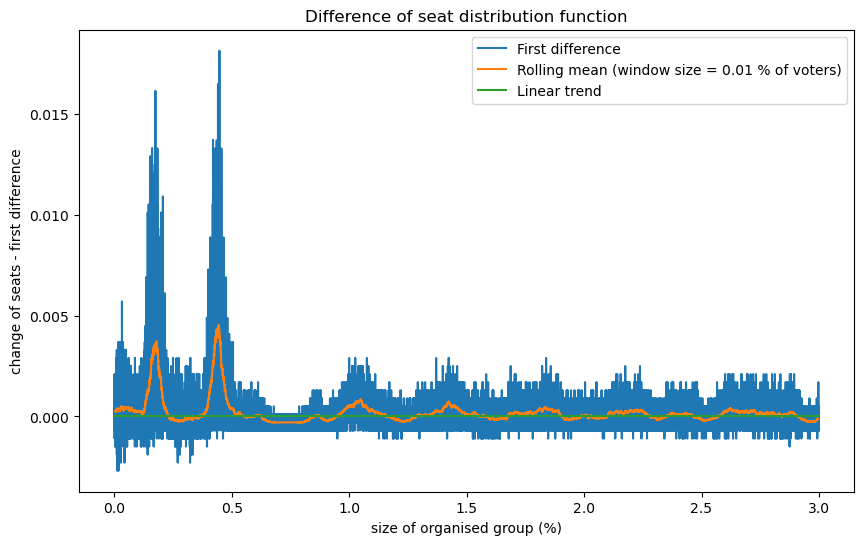

In [3]:
plt.figure(figsize=(10, 6))

x_values = (df['samples'] / 1000000) * 100
y_values = df['diff']
y_vals =  y_values - (3 * x_values)

y_deriv = y_vals.diff()
y_rolling = y_deriv.rolling(window=100, center=True).mean()

x = np.arange(0, 4)
y = 3 * x

plt.plot(x_values, y_deriv, '-', markersize=1, label="First difference")
plt.plot(x_values, y_rolling, '-', markersize=1, label="Rolling mean (window size = 0.01 % of voters)")

plt.plot(x, y * 0, label='Linear trend')

plt.xlabel('size of organised group (%)')
plt.ylabel('change of seats - first difference')
plt.title('Difference of seat distribution function')

plt.legend()
plt.show()




In [17]:
max_index = y_rolling.idxmax()
print(max_index)

max_index = y_rolling[:3000].idxmax()
print(max_index)

# top_10_highest = y_rolling.nlargest(10)
# top_10_indices = top_10_highest.index
# top_10_indices
visualise_and_print("./vis_data/electable-unweighted-vis-1m-2023.csv")

In [5]:
names = ["1m-2012.csv"]

for name in names:
    ## unweighted electable subjets
    raw2visualisable(name, weighted=False, only_electable=True)

{0: 1420976, 1: 9358, 2: 1817, 3: 533136, 4: 2401, 5: 264137, 6: 9867, 7: 3486, 8: 1262, 9: 7935, 10: 1335, 11: 1332, 12: 187645, 13: 65673, 14: 2786, 15: 166995, 16: 681017, 17: 436415, 18: 130183, 19: 2315, 20: 771, 21: 25003, 22: 87006, 23: 202515, 24: 2407, 25: 141099}
{0: 1, 1: 0, 2: 0, 3: 1, 4: 0, 5: 1, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 1, 13: 0, 14: 0, 15: 1, 16: 1, 17: 1, 18: 1, 19: 0, 20: 0, 21: 0, 22: 0, 23: 1, 24: 0, 25: 1}
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\janko\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\janko\AppData\Local\Temp\ipykernel_21316\1966456859.py", line 5, in <module>
    raw2visualisable(name, weighted=False, only_electable=True)
  File "c:\Users\janko\Desktop\MATFYZ\bakalarka\bc-praca\apportionment.py", line 299, in raw2visualisable
  File "c:\Users\janko\anaconda3x\Lib\site-packages\pandas\core\groupby\groupby.py", line 1824, in apply
    result = self._python_apply_general(f, self._selected_obj)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\janko\anaconda3x\Lib\site-packages\pandas\core\groupby\groupby.py", line 1885, in _python_apply_general
    values, mutated = self._grouper.apply_groupwise(f, data, self.axis)
                      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\janko\

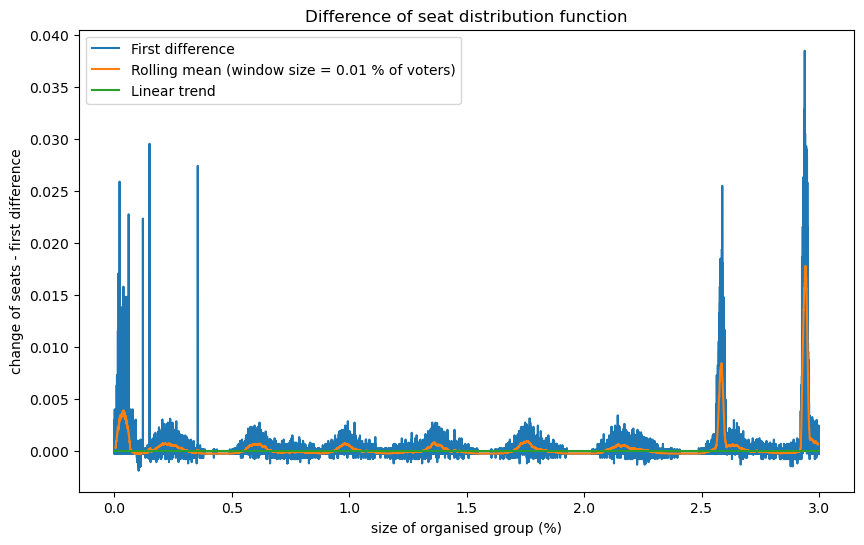

29426
394


In [28]:
visualise_and_print("./vis_data/electable-unweighted-vis-1m-2016.csv")

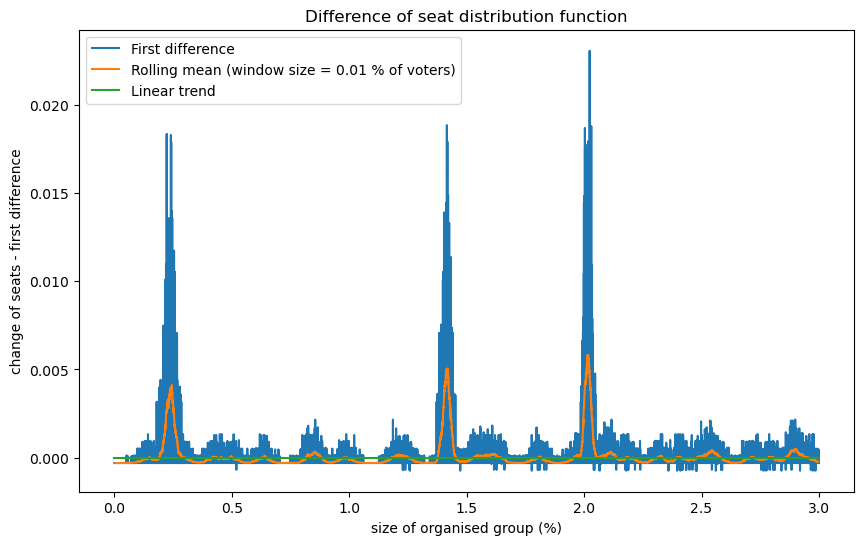

20166
2447


In [29]:
visualise_and_print("./vis_data/electable-unweighted-vis-1m-2020.csv")